<a href="https://colab.research.google.com/github/Nakamura-ta-hub/TsukubaRoomba/blob/main/TsukubaRoomba_EdgeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [125]:
# パッケージのインポート
from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
Train_images = []
Train_labels = []
Test_images = []
Test_labels = []
for i in range(3):
    for j in range(70):
        Train_labels.append(i)
        image = np.array(Image.open('trains/label{} ({}).jpg'.format(i,j+1)))
        Train_images.append(image)
    for k in range(15):
        Test_labels.append(i)
        image = np.array(Image.open('test/Test{}-{}.jpg'.format(i,k+1)))
        Test_images.append(image)

In [124]:
"""
for i in range(3):
    for j in range(70):
        name = "Train{}-{}".format(i,j)
        beautiful_view = Image.open('train_images/label{} ({}).jpg'.format(i,j+1))
        small_beautiful_view = beautiful_view.resize((40,30))
        small_beautiful_view.save(name)
"""
import os
from PIL import Image
from google.colab import drive,files
dir_name = "/content/drive/My Drive/TsukubaRoomba/train_images"
new_dir_name = "/content/drive/My Drive/TsukubaRoomba/trains2"
files = os.listdir(dir_name)
for file in files:
    photo = Image.open(os.path.join(dir_name, file))
    photo_resize = photo.resize((40,30))
    photo_resize.save(os.path.join(new_dir_name, file))

In [130]:
Train_images = np.array(Train_images)
Train_labels = np.array(Train_labels)
Test_images = np.array(Test_images)
Test_labels = np.array(Test_labels)
print(Train_images.shape)
print(Train_labels.shape)
print(Test_images.shape)
print(Test_labels.shape)

(210, 30, 40, 3)
(210,)
(45, 30, 40, 3)
(45,)


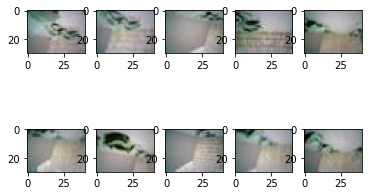

In [131]:
# データセットの画像の確認
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Train_images[i])
plt.show()

In [132]:
# データセットのラベルの確認
print(Train_labels[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [133]:
# データセットの画像の前処理
Train_images = Train_images.astype('float32')/255.0
Test_images = Test_images.astype('float32')/255.0

# データセットの画像の前処理後のシェイプの確認
print(Train_images.shape)
print(Test_images.shape)

(210, 30, 40, 3)
(45, 30, 40, 3)


In [134]:
# データセットのラベルの前処理
Train_labels = to_categorical(Train_labels, 3)
Test_labels = to_categorical(Test_labels, 3)

# データセットのラベルの前処理後のシェイプの確認
print(Train_labels.shape)
print(Test_labels.shape)

(210, 3)
(45, 3)


In [156]:
#モデルの作成
model = Sequential()

# Conv→Conv→Pool→Dropout
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(30, 40, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv→Conv→Pool→Dropout
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten→Dense→Dropout→Dense
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [157]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [158]:
# 学習
history = model.fit(Train_images, Train_labels, batch_size=50,
    epochs=15, validation_split=0.1)

Epoch 1/15
4/4 [==============================] - 2s 326ms/step - loss: 1.1349 - acc: 0.3473 - val_loss: 1.1122 - val_acc: 0.0000e+00
Epoch 2/15
4/4 [==============================] - 1s 268ms/step - loss: 1.0933 - acc: 0.3648 - val_loss: 1.1967 - val_acc: 0.0000e+00
Epoch 3/15
4/4 [==============================] - 1s 261ms/step - loss: 1.0636 - acc: 0.5065 - val_loss: 1.3363 - val_acc: 0.0000e+00
Epoch 4/15
4/4 [==============================] - 1s 281ms/step - loss: 0.9928 - acc: 0.5919 - val_loss: 1.1596 - val_acc: 0.0000e+00
Epoch 5/15
4/4 [==============================] - 1s 283ms/step - loss: 0.8479 - acc: 0.5867 - val_loss: 1.0501 - val_acc: 0.0000e+00
Epoch 6/15
4/4 [==============================] - 1s 311ms/step - loss: 0.8387 - acc: 0.6183 - val_loss: 1.4791 - val_acc: 0.0000e+00
Epoch 7/15
4/4 [==============================] - 1s 265ms/step - loss: 0.7445 - acc: 0.6219 - val_loss: 0.7422 - val_acc: 0.5714
Epoch 8/15
4/4 [==============================] - 1s 280ms/step - 

In [159]:
# モデルの保存
model.save('Leaves_CNN_test.h5')

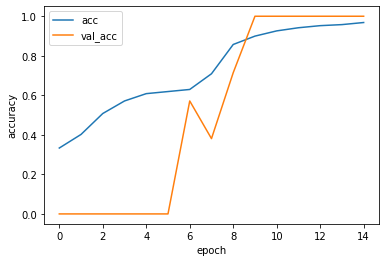

In [160]:
# グラフの表示
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [161]:
# 評価
test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

2/2 [==============================] - 0s 23ms/step - loss: 0.0725 - acc: 0.9778
loss: 0.073
acc: 0.978


IndexError: ignored

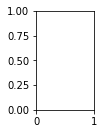

In [148]:
# 推論する画像の表示
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
plt.show()

# 推論したラベルの表示
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_predictions])